In [1]:
import os
import sys
import warnings

import pdb

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import tree

from utils import MySet

from utils import local_data
from utils import window
from utils import Scale, give_error
from utils import generate_and_avaliate_model

from utils import location_station, find_set_sunrise, find_set_sunset

%matplotlib inline
warnings.filterwarnings('ignore')

latter_size = 14
plt.rcParams['legend.fontsize'] = latter_size 
plt.rcParams['font.size'] = latter_size 
plt.rcParams['axes.labelsize'] = latter_size
plt.rcParams['xtick.labelsize'] = latter_size
plt.rcParams['ytick.labelsize'] = latter_size

In [2]:
df = pd.read_pickle('./data/sj2_analise_update.pkl')

In [3]:
df.columns

Index(['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2',
       'gvtec2_dt', 'state_night', 'state_dawn', 'vm1', 'vd1', 'vm2', 'vd2',
       'gvtec1_dt_lag_9', 'gvtec2_dt_lag_20', 'vtec_dt_lag_3', 's4'],
      dtype='object')

In [4]:
original = MySet('original', ['vtec', 'vtec_dt', 'vtec_dt2', 'gvtec1', 'gvtec1_dt', 'gvtec2', 'gvtec2_dt'])
tempo  = MySet('tempo', ['state_night', 'state_dawn'])
mdv1 = MySet('mdv1', ['vm1', 'vd1'])
mdv2 = MySet('mdv2', ['vm2', 'vd2'])
lag = MySet('lag', ['gvtec1_dt_lag_9', 'gvtec2_dt_lag_20'])

vtec = MySet('vtec', ['vtec'])
vtec_dt = MySet('vtec_dt', ['vtec_dt'])
vtec_dt2 = MySet('vtec_dt2', ['vtec_dt2'])
gvtec1 = MySet('gvtec1', ['gvtec1'])
gvtec1_dt = MySet('gvtec1_dt', ['gvtec1_dt'])
gvtec2 = MySet('gvtec2', ['gvtec2'])
gvtec2_dt = MySet('gvtec2_dt', ['gvtec2_dt'])
state_night = MySet('state_night', ['state_night'])
state_dawn = MySet('state_dawn', ['state_dawn'])
vm1 = MySet('vm1', ['vm1'])
vd1 = MySet('vd1', ['vd1'])
vm2 = MySet('vm2', ['vm2'])
vd2 = MySet('vd2', ['vd2'])
gvtec1_dt_lag_9 = MySet('gvtec1_dt_lag_9', ['gvtec1_dt_lag_9'])
gvtec2_dt_lag_20 = MySet('gvtec2_dt_lag_20', ['gvtec2_dt_lag_20'])

In [5]:
set_tests = [original,
             original-vtec,
             original-vtec_dt,
             original-gvtec1,
             original-gvtec1_dt,
             original-gvtec2,
             original-gvtec2_dt,
             original+tempo,
             original+gvtec1_dt_lag_9,
             original+gvtec2_dt_lag_20,
             original+lag,
             original+mdv1,
             original+mdv2,
             original+tempo+lag,
             original+tempo+mdv2,
             original+tempo+mdv2+lag,
             original+tempo+lag+mdv1+mdv2,
             vtec,
             vtec+gvtec1_dt_lag_9,
             vtec+gvtec2_dt_lag_20,
             vtec+vtec_dt+vtec_dt2,
             vtec+gvtec1+gvtec2,
             vtec+tempo,
             vtec+tempo+mdv1,
             vtec+tempo+lag,
             vtec+tempo+lag+mdv1,
             vtec+tempo+lag+mdv2,
             vtec+tempo+lag+mdv1+mdv2]

original
Error for the time series sample:
O erro quadrático médio foi: 0.008140
O erro quadrático total foi: 2.138814
O maior erro por previsão foi: 0.460197
O erro relativo foi: 20.092400%
O número de verdadeiros negativos foi: 286
O número de verdadeiros positivos foi: 126
O número de falsos negativos foi: 27
O número de falsos positivos foi: 123
O POD foi: 0.823529
O FAR foi: 0.493976
A ACC foi: 0.733096
O kappa foi: 0.073517
precission: 0.506024
recal: 0.823529
f1: 0.626866


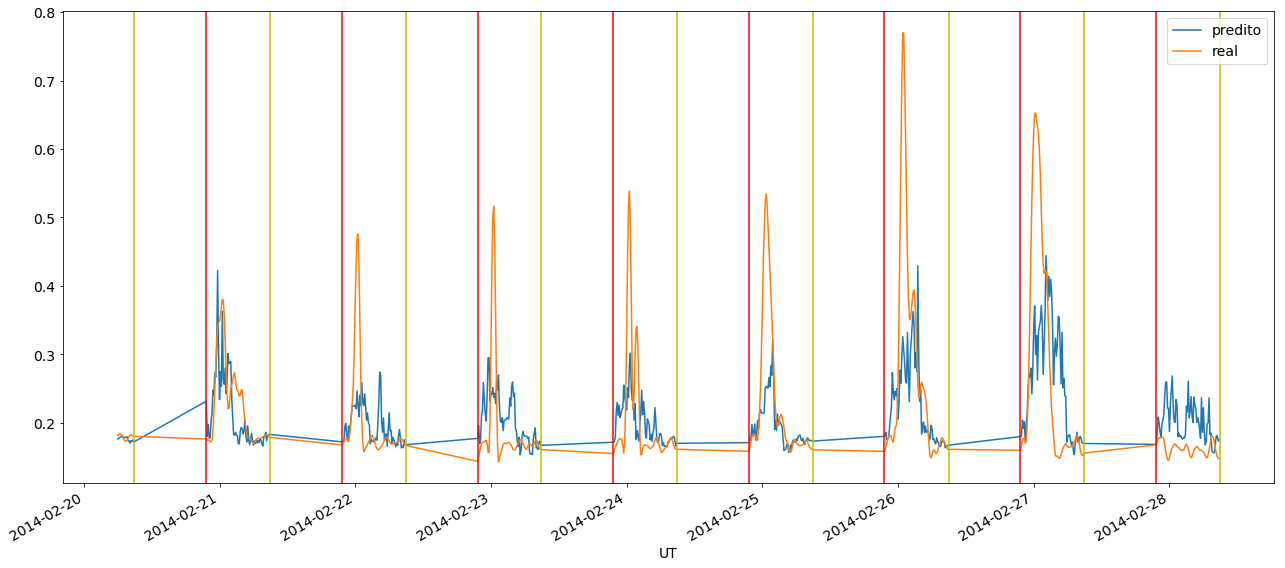


original - vtec
Error for the time series sample:
O erro quadrático médio foi: 0.009369
O erro quadrático total foi: 2.294631
O maior erro por previsão foi: 0.441452
O erro relativo foi: 29.171218%
O número de verdadeiros negativos foi: 216
O número de verdadeiros positivos foi: 121
O número de falsos negativos foi: 32
O número de falsos positivos foi: 193
O POD foi: 0.790850
O FAR foi: 0.614650
A ACC foi: 0.599644
O kappa foi: 0.095823
precission: 0.385350
recal: 0.790850
f1: 0.518201


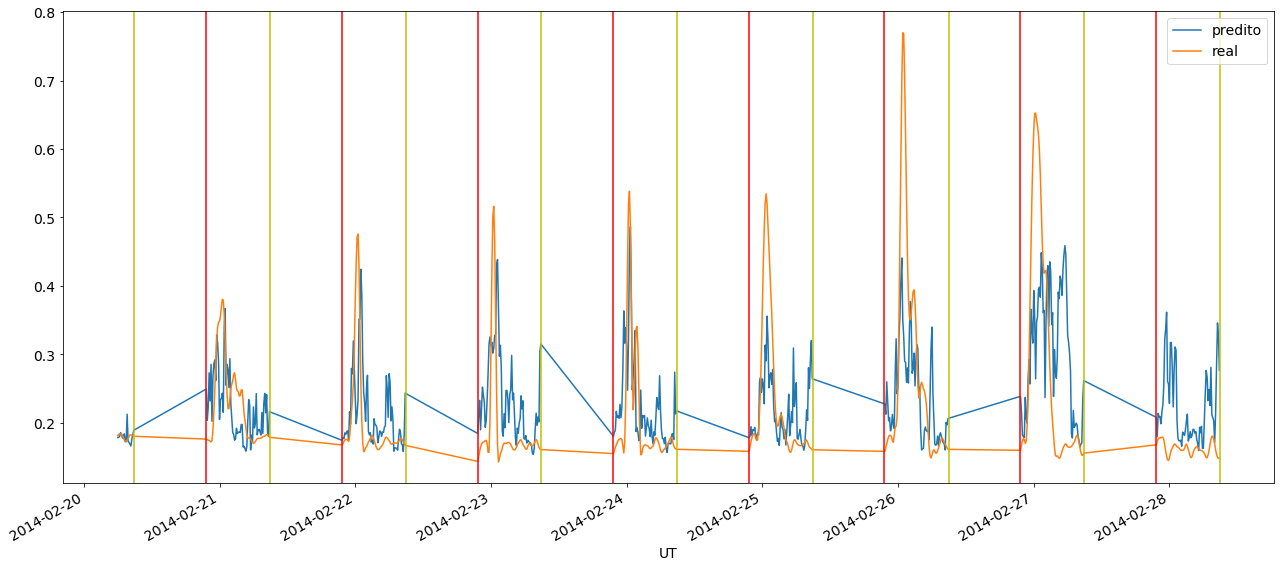


original - vtec_dt
Error for the time series sample:
O erro quadrático médio foi: 0.008309
O erro quadrático total foi: 2.160979
O maior erro por previsão foi: 0.444381
O erro relativo foi: 21.692664%
O número de verdadeiros negativos foi: 275
O número de verdadeiros positivos foi: 124
O número de falsos negativos foi: 29
O número de falsos positivos foi: 134
O POD foi: 0.810458
O FAR foi: 0.519380
A ACC foi: 0.709964
O kappa foi: 0.077858
precission: 0.480620
recal: 0.810458
f1: 0.603406


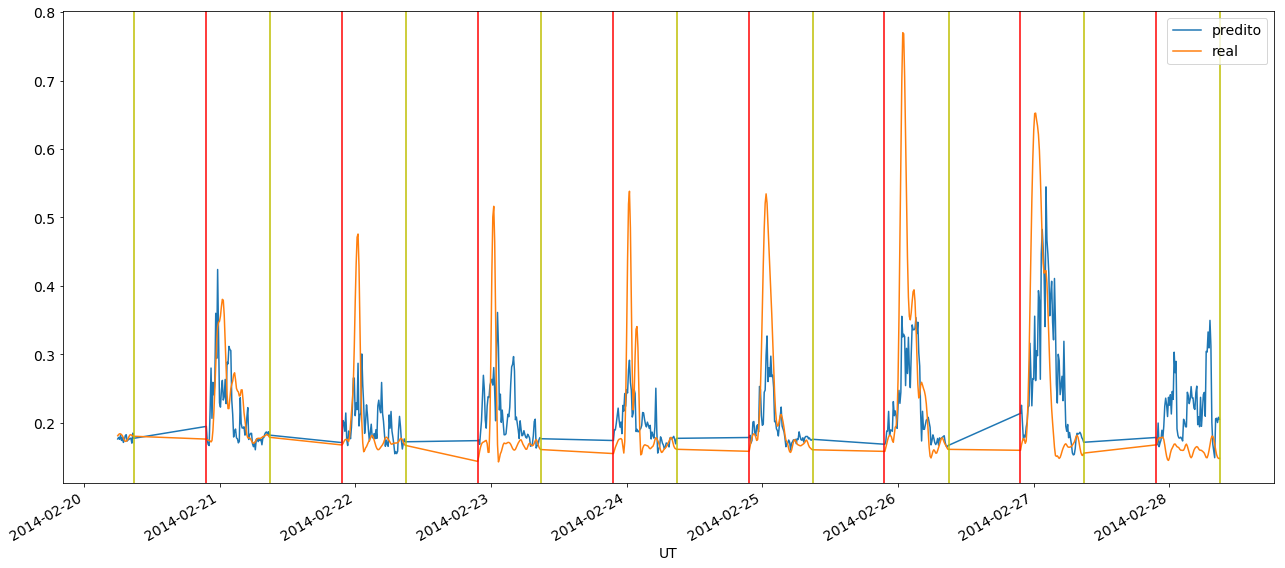


original - gvtec1
Error for the time series sample:
O erro quadrático médio foi: 0.008784
O erro quadrático total foi: 2.221882
O maior erro por previsão foi: 0.433383
O erro relativo foi: 20.978627%
O número de verdadeiros negativos foi: 286
O número de verdadeiros positivos foi: 123
O número de falsos negativos foi: 30
O número de falsos positivos foi: 123
O POD foi: 0.803922
O FAR foi: 0.500000
A ACC foi: 0.727758
O kappa foi: 0.075066
precission: 0.500000
recal: 0.803922
f1: 0.616541


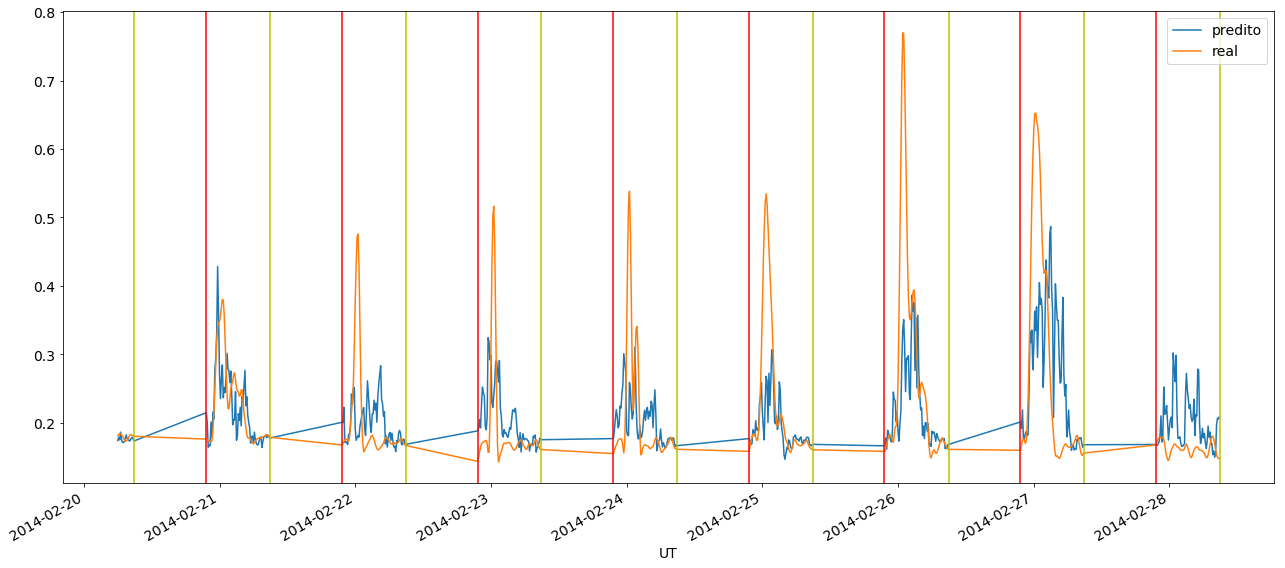


original - gvtec1_dt
Error for the time series sample:
O erro quadrático médio foi: 0.008664
O erro quadrático total foi: 2.206597
O maior erro por previsão foi: 0.491582
O erro relativo foi: 20.044152%
O número de verdadeiros negativos foi: 303
O número de verdadeiros positivos foi: 118
O número de falsos negativos foi: 35
O número de falsos positivos foi: 106
O POD foi: 0.771242
O FAR foi: 0.473214
A ACC foi: 0.749110
O kappa foi: 0.073179
precission: 0.526786
recal: 0.771242
f1: 0.625995


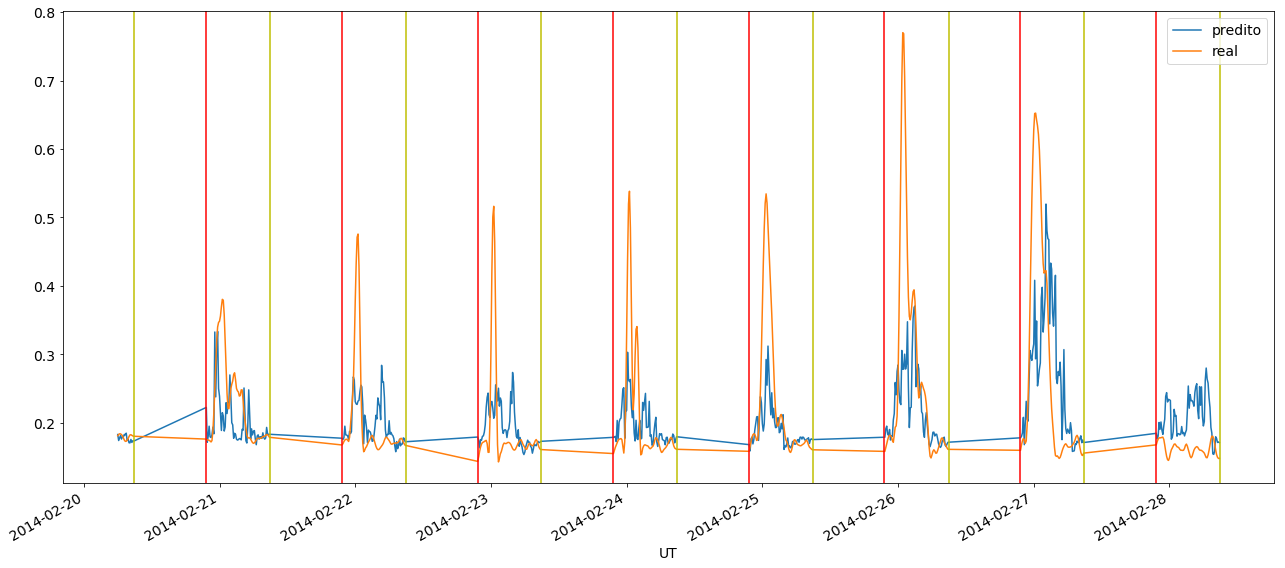


original - gvtec2
Error for the time series sample:
O erro quadrático médio foi: 0.009070
O erro quadrático total foi: 2.257710
O maior erro por previsão foi: 0.496425
O erro relativo foi: 25.865782%
O número de verdadeiros negativos foi: 235
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 174
O POD foi: 0.830065
O FAR foi: 0.578073
A ACC foi: 0.644128
O kappa foi: 0.089310
precission: 0.421927
recal: 0.830065
f1: 0.559471


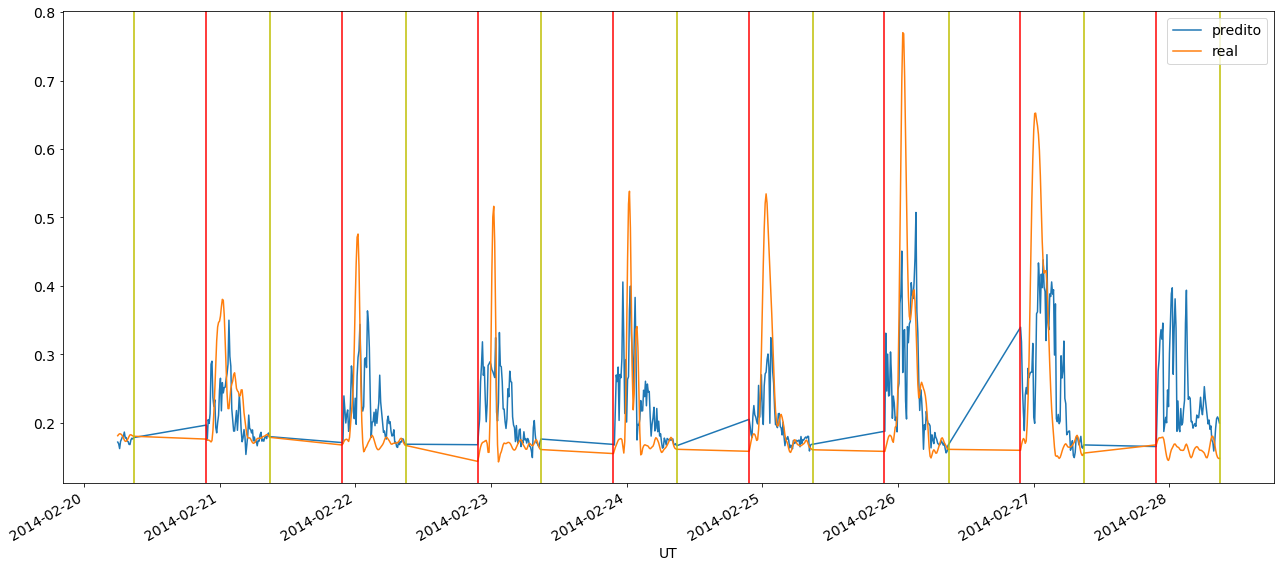


original - gvtec2_dt
Error for the time series sample:
O erro quadrático médio foi: 0.009625
O erro quadrático total foi: 2.325837
O maior erro por previsão foi: 0.467883
O erro relativo foi: 23.236503%
O número de verdadeiros negativos foi: 289
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 120
O POD foi: 0.816993
O FAR foi: 0.489796
A ACC foi: 0.736655
O kappa foi: 0.073112
precission: 0.510204
recal: 0.816993
f1: 0.628141


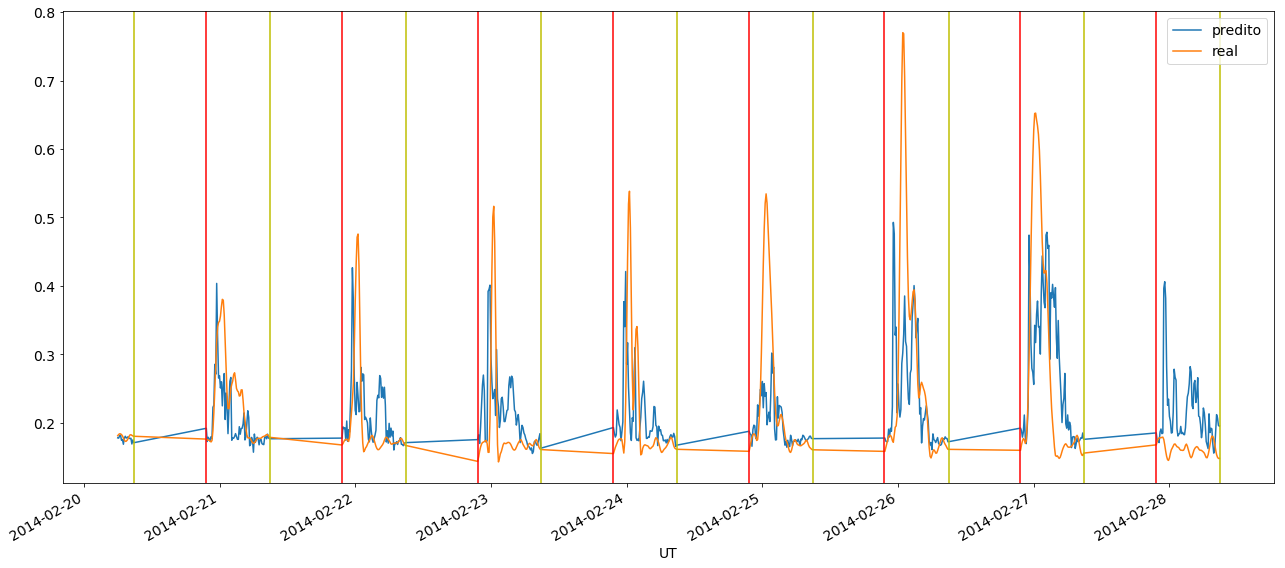


original + tempo
Error for the time series sample:
O erro quadrático médio foi: 0.008363
O erro quadrático total foi: 2.167982
O maior erro por previsão foi: 0.475162
O erro relativo foi: 23.187842%
O número de verdadeiros negativos foi: 255
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 154
O POD foi: 0.816993
O FAR foi: 0.551971
A ACC foi: 0.676157
O kappa foi: 0.083554
precission: 0.448029
recal: 0.816993
f1: 0.578704


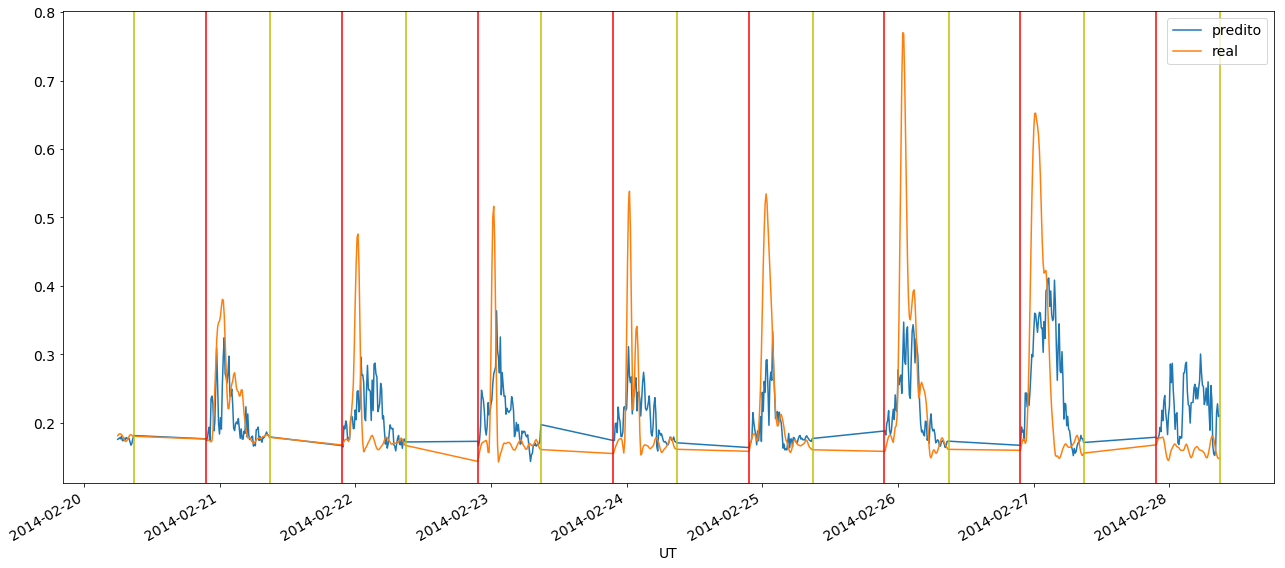


original + gvtec1_dt_lag_9
Error for the time series sample:
O erro quadrático médio foi: 0.007538
O erro quadrático total foi: 2.058221
O maior erro por previsão foi: 0.498939
O erro relativo foi: 21.725912%
O número de verdadeiros negativos foi: 283
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 126
O POD foi: 0.816993
O FAR foi: 0.501992
A ACC foi: 0.725979
O kappa foi: 0.074955
precission: 0.498008
recal: 0.816993
f1: 0.618812


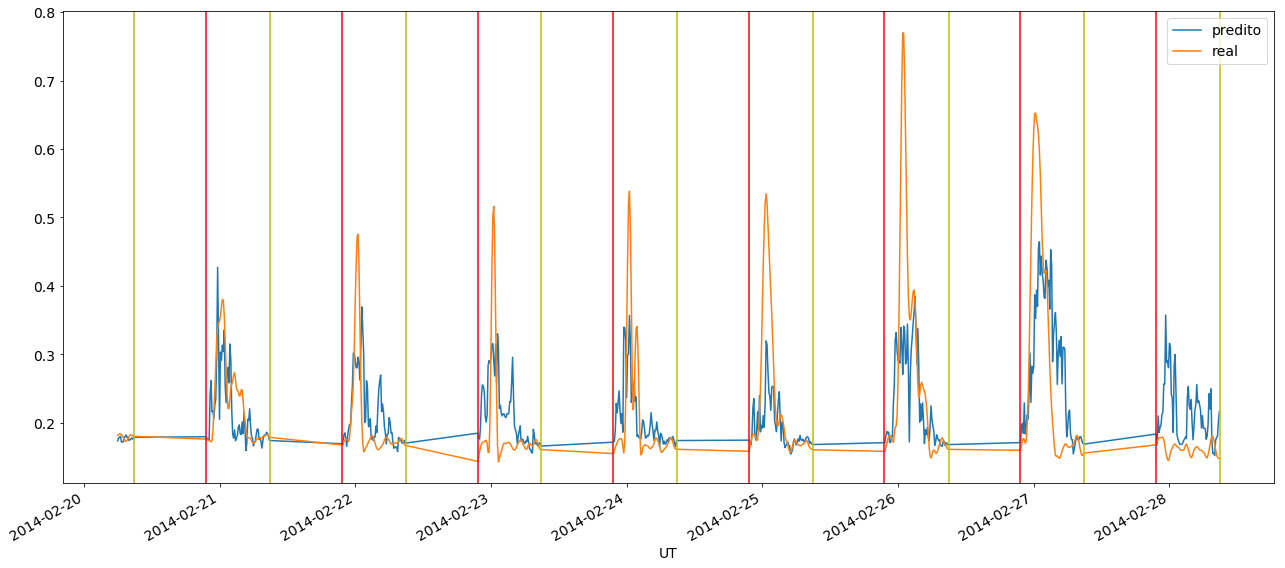


original + gvtec2_dt_lag_20
Error for the time series sample:
O erro quadrático médio foi: 0.007359
O erro quadrático total foi: 2.033613
O maior erro por previsão foi: 0.453536
O erro relativo foi: 20.378536%
O número de verdadeiros negativos foi: 286
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 123
O POD foi: 0.797386
O FAR foi: 0.502041
A ACC foi: 0.725979
O kappa foi: 0.075582
precission: 0.497959
recal: 0.797386
f1: 0.613065


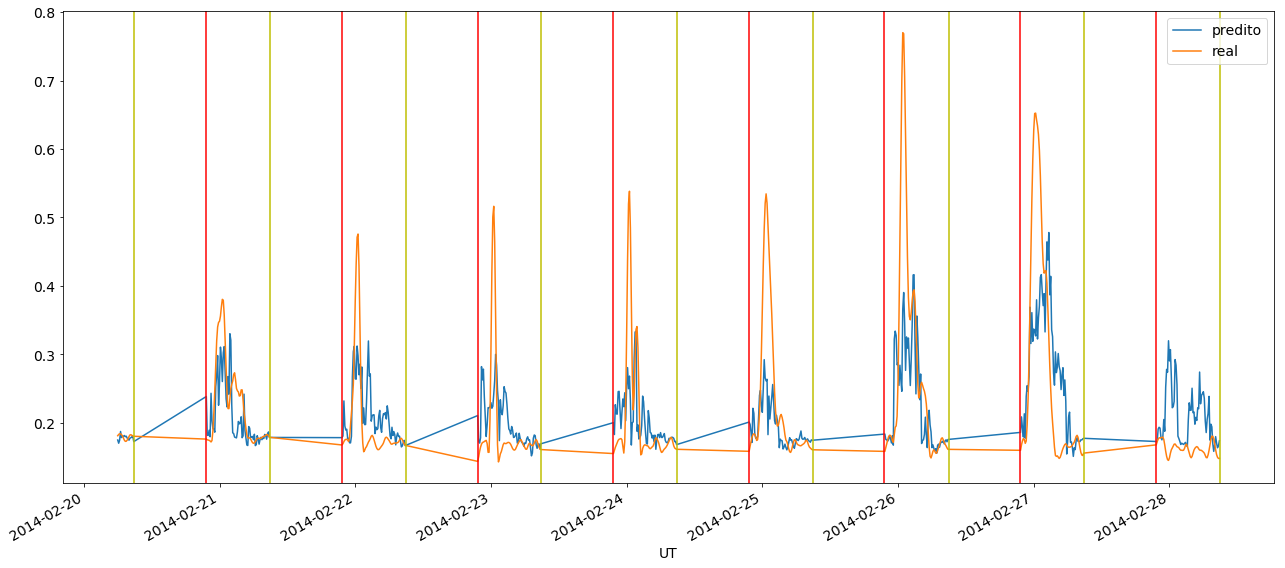


original + lag
Error for the time series sample:
O erro quadrático médio foi: 0.007328
O erro quadrático total foi: 2.029324
O maior erro por previsão foi: 0.443627
O erro relativo foi: 20.206840%
O número de verdadeiros negativos foi: 281
O número de verdadeiros positivos foi: 135
O número de falsos negativos foi: 18
O número de falsos positivos foi: 128
O POD foi: 0.882353
O FAR foi: 0.486692
A ACC foi: 0.740214
O kappa foi: 0.070725
precission: 0.513308
recal: 0.882353
f1: 0.649038


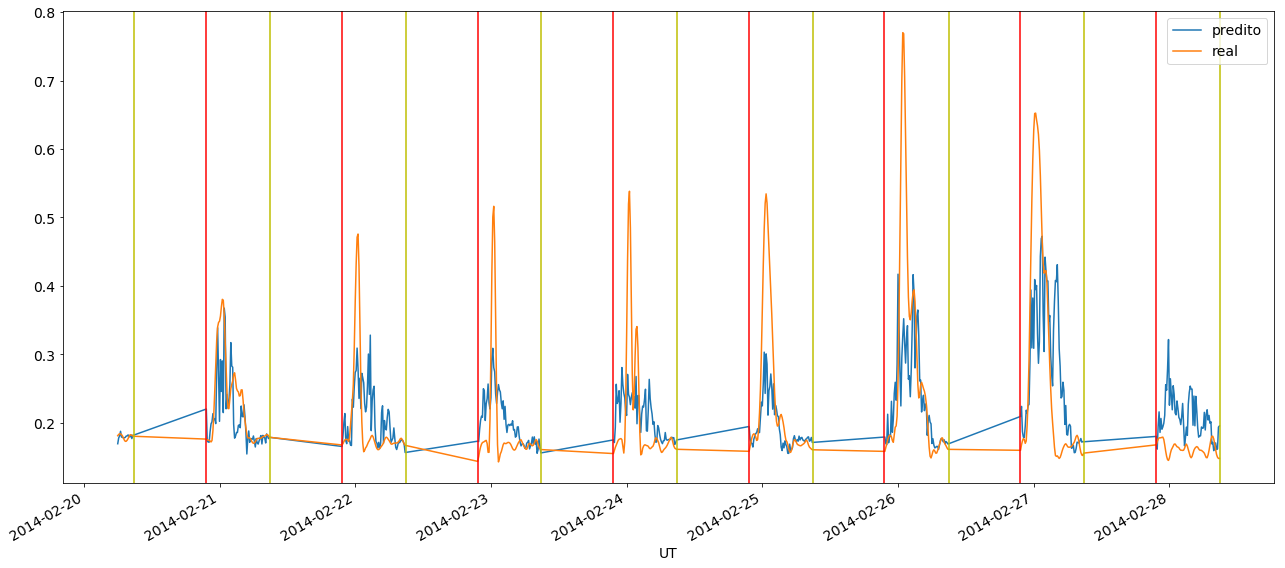


original + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.007629
O erro quadrático total foi: 2.070564
O maior erro por previsão foi: 0.405332
O erro relativo foi: 24.668874%
O número de verdadeiros negativos foi: 252
O número de verdadeiros positivos foi: 133
O número de falsos negativos foi: 20
O número de falsos positivos foi: 157
O POD foi: 0.869281
O FAR foi: 0.541379
A ACC foi: 0.685053
O kappa foi: 0.082069
precission: 0.458621
recal: 0.869281
f1: 0.600451


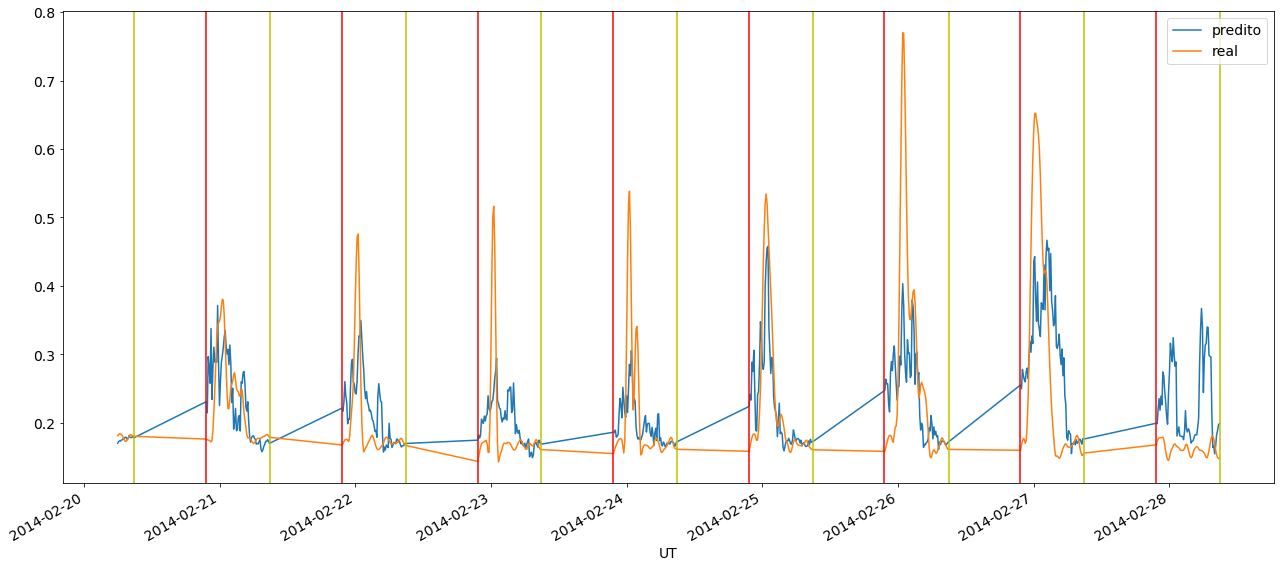


original + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.008297
O erro quadrático total foi: 2.159355
O maior erro por previsão foi: 0.426506
O erro relativo foi: 22.701884%
O número de verdadeiros negativos foi: 251
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 158
O POD foi: 0.830065
O FAR foi: 0.554386
A ACC foi: 0.672598
O kappa foi: 0.084193
precission: 0.445614
recal: 0.830065
f1: 0.579909


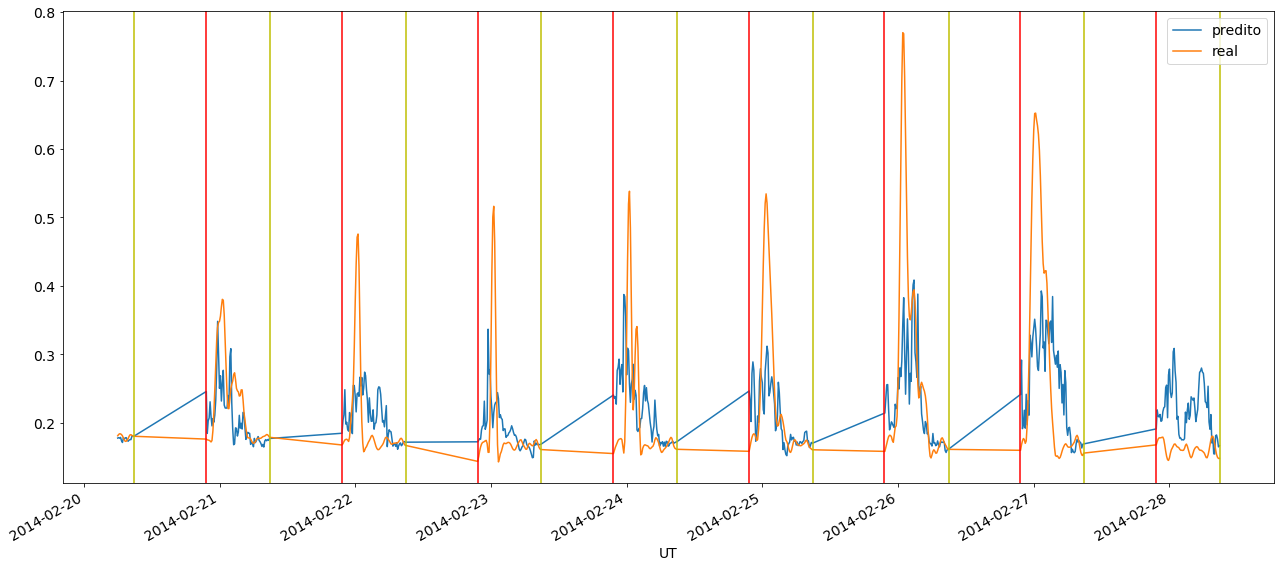


original + tempo + lag
Error for the time series sample:
O erro quadrático médio foi: 0.007430
O erro quadrático total foi: 2.043464
O maior erro por previsão foi: 0.460652
O erro relativo foi: 22.237194%
O número de verdadeiros negativos foi: 276
O número de verdadeiros positivos foi: 127
O número de falsos negativos foi: 26
O número de falsos positivos foi: 133
O POD foi: 0.830065
O FAR foi: 0.511538
A ACC foi: 0.717082
O kappa foi: 0.076199
precission: 0.488462
recal: 0.830065
f1: 0.615012


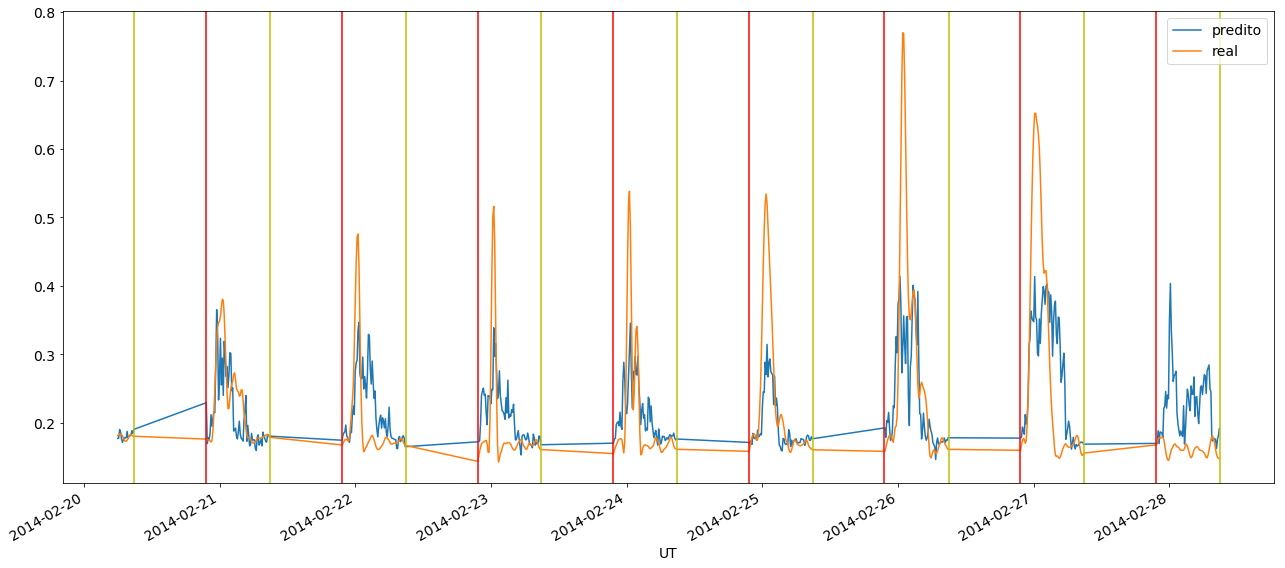


original + tempo + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.008253
O erro quadrático total foi: 2.153612
O maior erro por previsão foi: 0.461739
O erro relativo foi: 23.955388%
O número de verdadeiros negativos foi: 229
O número de verdadeiros positivos foi: 137
O número de falsos negativos foi: 16
O número de falsos positivos foi: 180
O POD foi: 0.895425
O FAR foi: 0.567823
A ACC foi: 0.651246
O kappa foi: 0.089677
precission: 0.432177
recal: 0.895425
f1: 0.582979


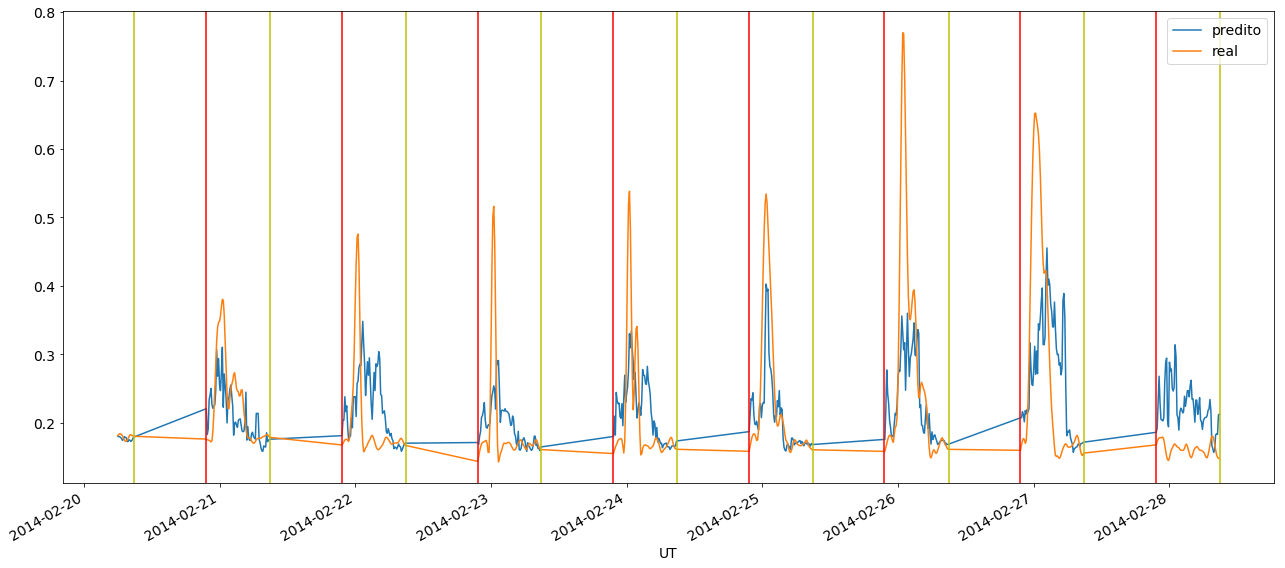


original + tempo + mdv2 + lag
Error for the time series sample:
O erro quadrático médio foi: 0.007428
O erro quadrático total foi: 2.043139
O maior erro por previsão foi: 0.440944
O erro relativo foi: 23.155363%
O número de verdadeiros negativos foi: 253
O número de verdadeiros positivos foi: 130
O número de falsos negativos foi: 23
O número de falsos positivos foi: 156
O POD foi: 0.849673
O FAR foi: 0.545455
A ACC foi: 0.681495
O kappa foi: 0.082633
precission: 0.454545
recal: 0.849673
f1: 0.592255


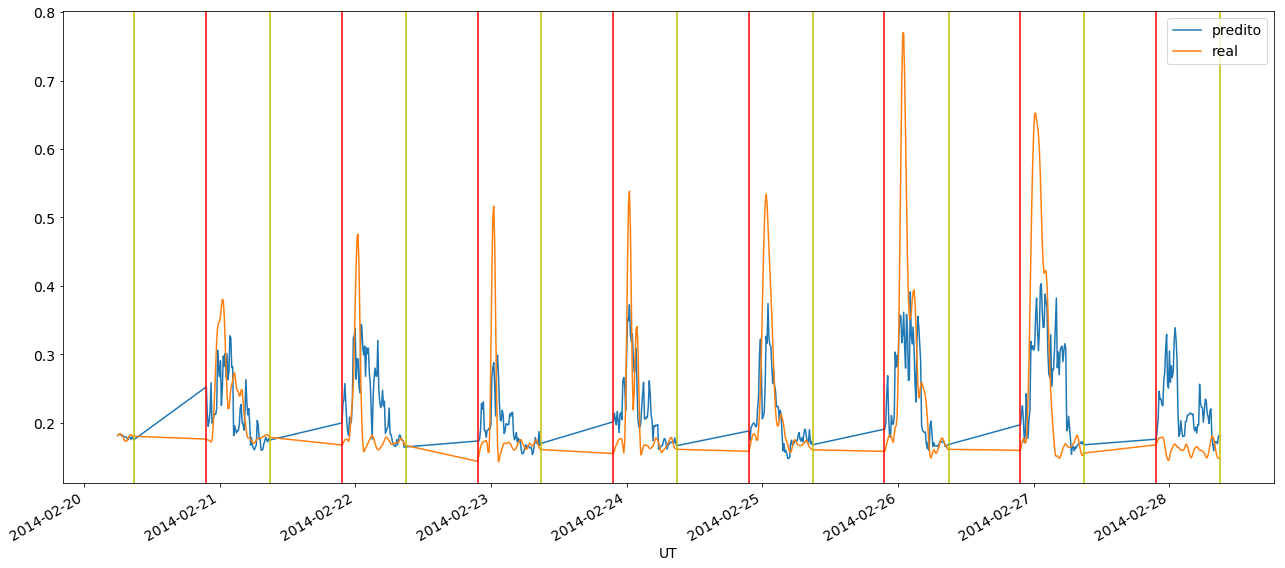


original + tempo + lag + mdv1 + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.007806
O erro quadrático total foi: 2.094502
O maior erro por previsão foi: 0.411017
O erro relativo foi: 25.692865%
O número de verdadeiros negativos foi: 244
O número de verdadeiros positivos foi: 136
O número de falsos negativos foi: 17
O número de falsos positivos foi: 165
O POD foi: 0.888889
O FAR foi: 0.548173
A ACC foi: 0.676157
O kappa foi: 0.084181
precission: 0.451827
recal: 0.888889
f1: 0.599119


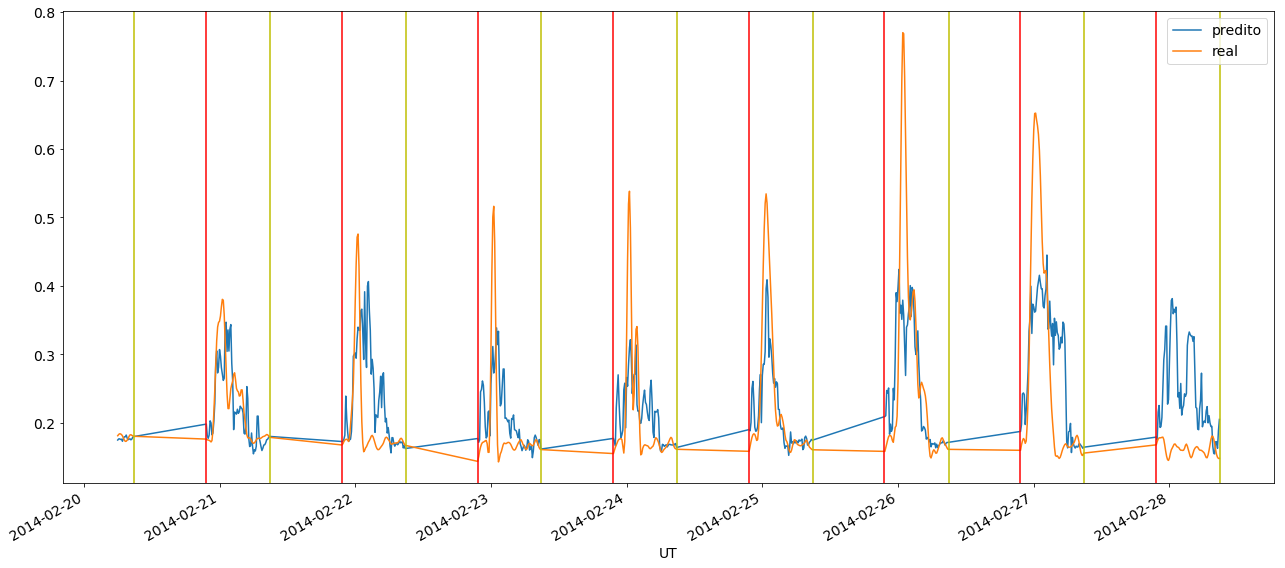


vtec
Error for the time series sample:
O erro quadrático médio foi: 0.012199
O erro quadrático total foi: 2.618383
O maior erro por previsão foi: 0.537028
O erro relativo foi: 26.174720%
O número de verdadeiros negativos foi: 278
O número de verdadeiros positivos foi: 88
O número de falsos negativos foi: 65
O número de falsos positivos foi: 131
O POD foi: 0.575163
O FAR foi: 0.598174
A ACC foi: 0.651246
O kappa foi: 0.093711
precission: 0.401826
recal: 0.575163
f1: 0.473118


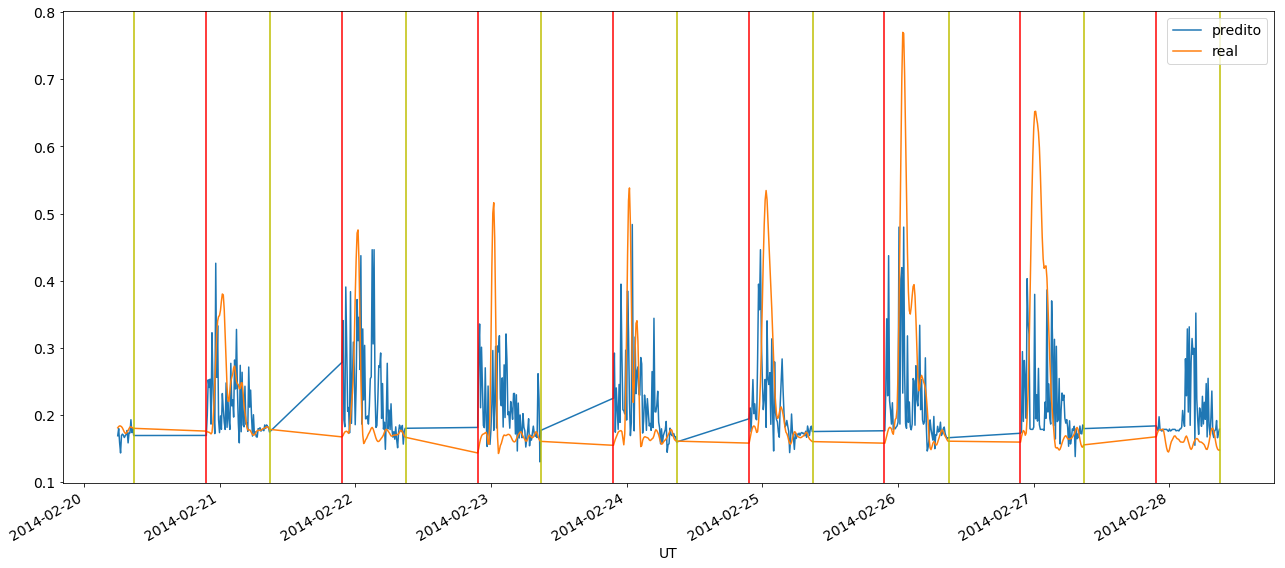


vtec + gvtec1_dt_lag_9
Error for the time series sample:
O erro quadrático médio foi: 0.009710
O erro quadrático total foi: 2.335977
O maior erro por previsão foi: 0.523226
O erro relativo foi: 28.515437%
O número de verdadeiros negativos foi: 220
O número de verdadeiros positivos foi: 128
O número de falsos negativos foi: 25
O número de falsos positivos foi: 189
O POD foi: 0.836601
O FAR foi: 0.596215
A ACC foi: 0.619217
O kappa foi: 0.094008
precission: 0.403785
recal: 0.836601
f1: 0.544681


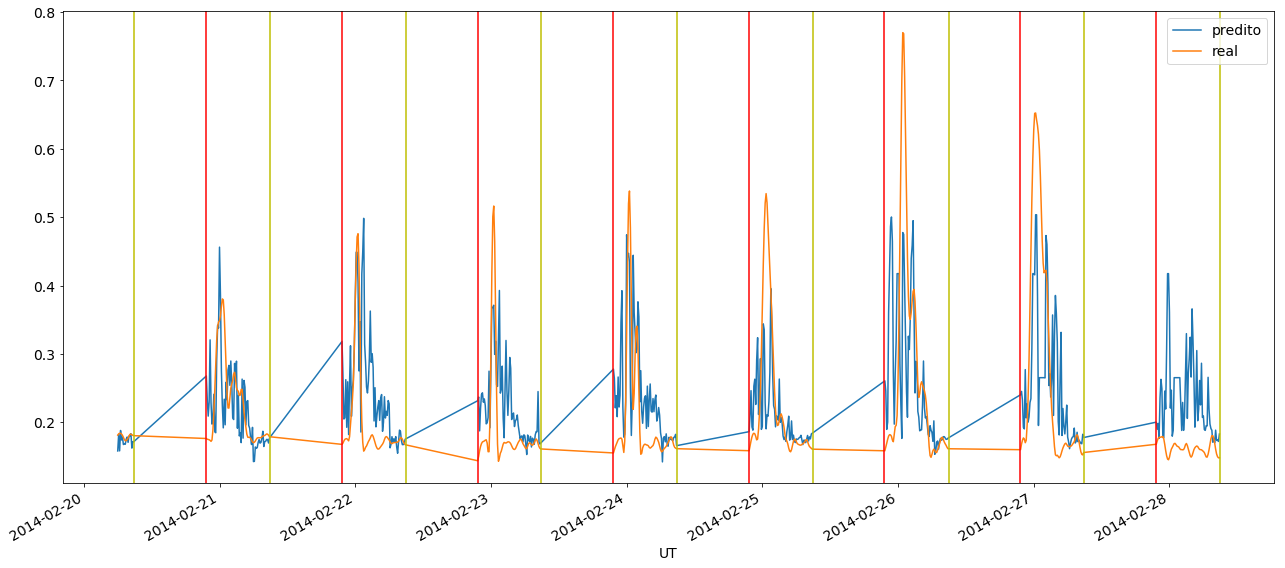


vtec + gvtec2_dt_lag_20
Error for the time series sample:
O erro quadrático médio foi: 0.008355
O erro quadrático total foi: 2.166901
O maior erro por previsão foi: 0.426064
O erro relativo foi: 22.829708%
O número de verdadeiros negativos foi: 294
O número de verdadeiros positivos foi: 113
O número de falsos negativos foi: 40
O número de falsos positivos foi: 115
O POD foi: 0.738562
O FAR foi: 0.504386
A ACC foi: 0.724199
O kappa foi: 0.078377
precission: 0.495614
recal: 0.738562
f1: 0.593176


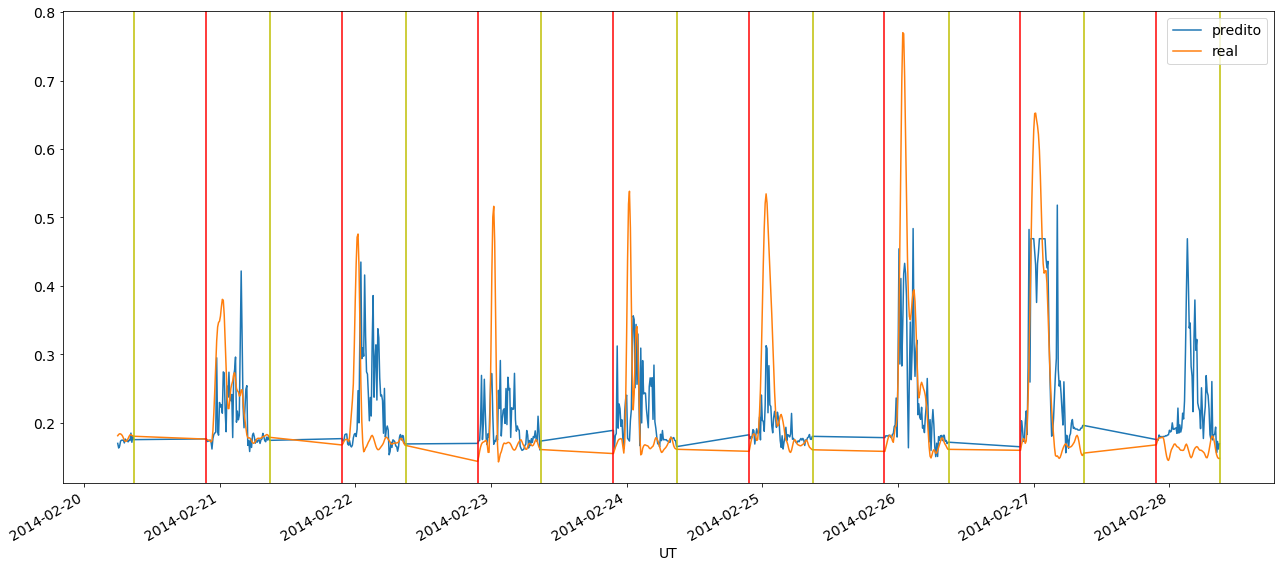


vtec + vtec_dt + vtec_dt2
Error for the time series sample:
O erro quadrático médio foi: 0.010919
O erro quadrático total foi: 2.477239
O maior erro por previsão foi: 0.514112
O erro relativo foi: 28.359050%
O número de verdadeiros negativos foi: 234
O número de verdadeiros positivos foi: 132
O número de falsos negativos foi: 21
O número de falsos positivos foi: 175
O POD foi: 0.862745
O FAR foi: 0.570033
A ACC foi: 0.651246
O kappa foi: 0.088696
precission: 0.429967
recal: 0.862745
f1: 0.573913


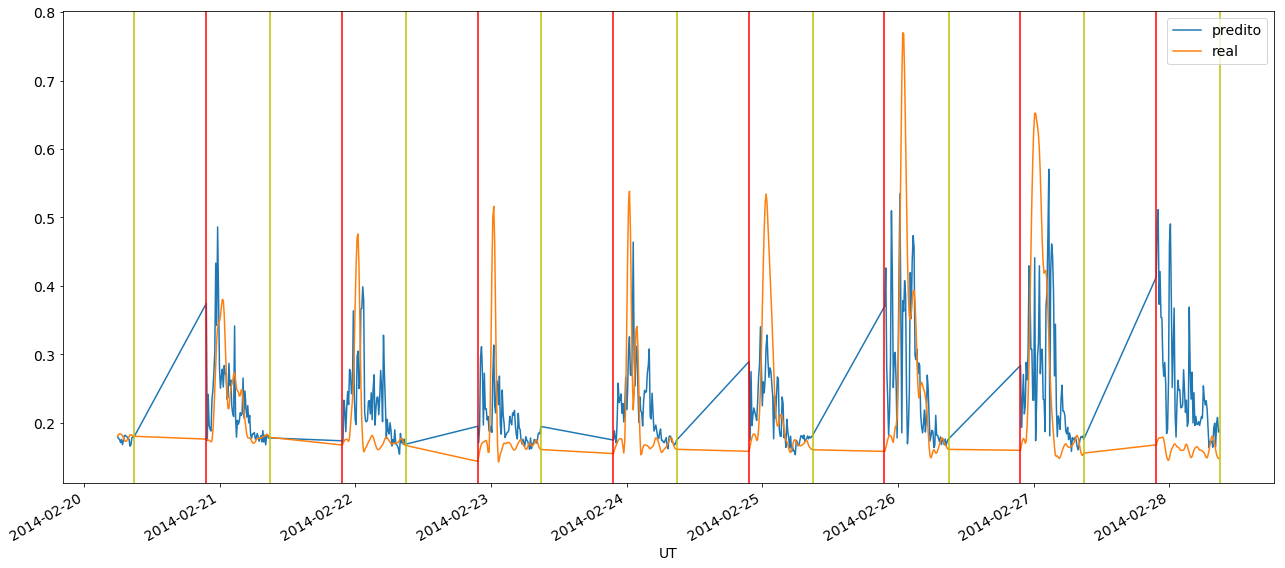


vtec + gvtec1 + gvtec2
Error for the time series sample:
O erro quadrático médio foi: 0.010753
O erro quadrático total foi: 2.458317
O maior erro por previsão foi: 0.535632
O erro relativo foi: 21.312300%
O número de verdadeiros negativos foi: 327
O número de verdadeiros positivos foi: 108
O número de falsos negativos foi: 45
O número de falsos positivos foi: 82
O POD foi: 0.705882
O FAR foi: 0.431579
A ACC foi: 0.774021
O kappa foi: 0.074629
precission: 0.568421
recal: 0.705882
f1: 0.629738


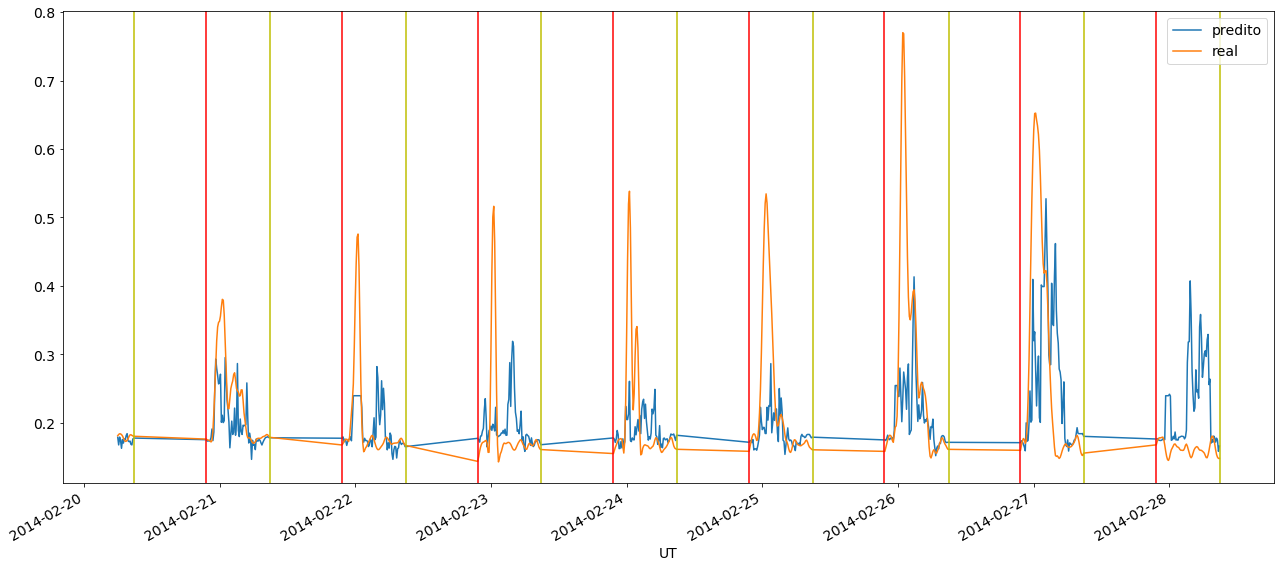


vtec + tempo
Error for the time series sample:
O erro quadrático médio foi: 0.012195
O erro quadrático total foi: 2.617928
O maior erro por previsão foi: 0.470363
O erro relativo foi: 28.476560%
O número de verdadeiros negativos foi: 265
O número de verdadeiros positivos foi: 118
O número de falsos negativos foi: 35
O número de falsos positivos foi: 144
O POD foi: 0.771242
O FAR foi: 0.549618
A ACC foi: 0.681495
O kappa foi: 0.083164
precission: 0.450382
recal: 0.771242
f1: 0.568675


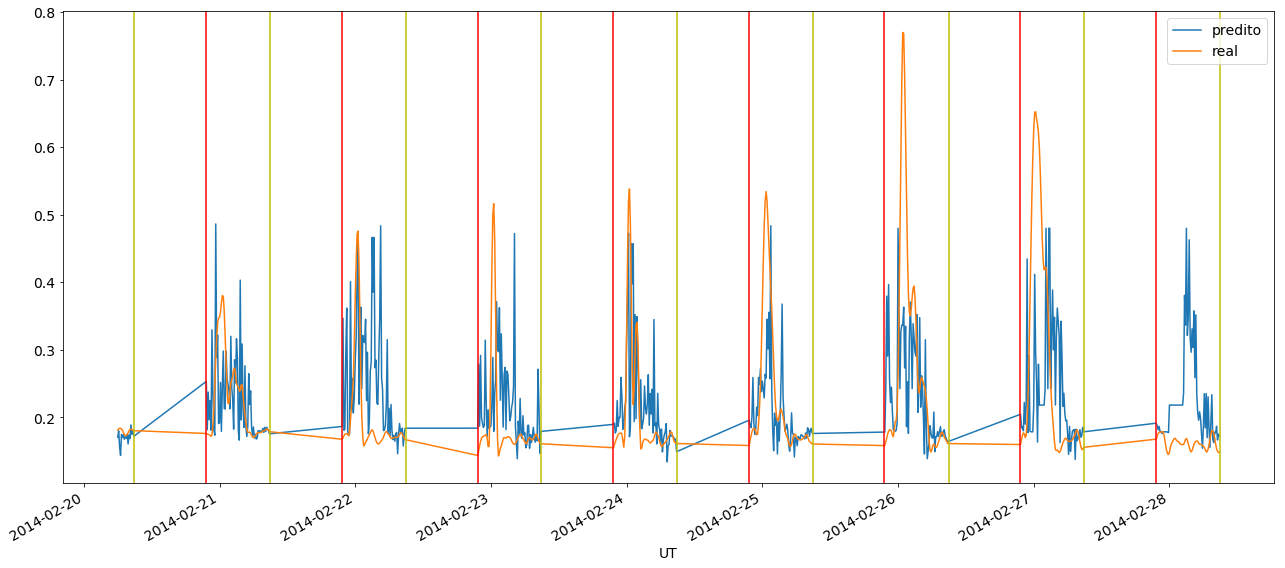


vtec + tempo + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.017250
O erro quadrático total foi: 3.113619
O maior erro por previsão foi: 0.415410
O erro relativo foi: 37.342510%
O número de verdadeiros negativos foi: 235
O número de verdadeiros positivos foi: 124
O número de falsos negativos foi: 29
O número de falsos positivos foi: 174
O POD foi: 0.810458
O FAR foi: 0.583893
A ACC foi: 0.638790
O kappa foi: 0.089889
precission: 0.416107
recal: 0.810458
f1: 0.549889


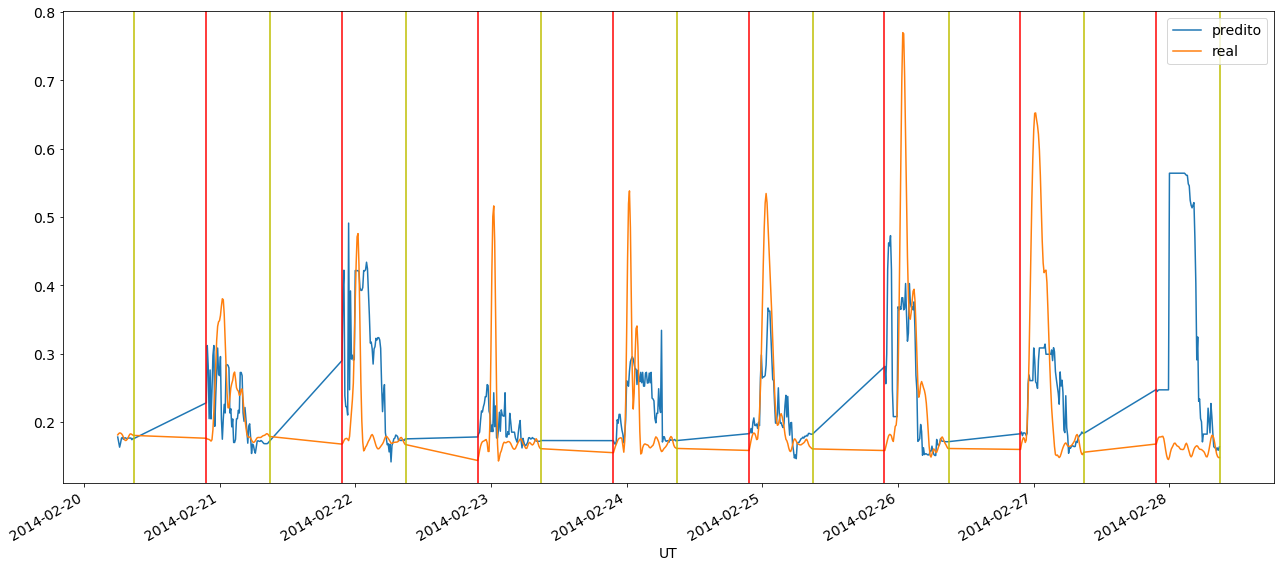


vtec + tempo + lag
Error for the time series sample:
O erro quadrático médio foi: 0.008455
O erro quadrático total foi: 2.179869
O maior erro por previsão foi: 0.464341
O erro relativo foi: 25.643551%
O número de verdadeiros negativos foi: 275
O número de verdadeiros positivos foi: 126
O número de falsos negativos foi: 27
O número de falsos positivos foi: 134
O POD foi: 0.823529
O FAR foi: 0.515385
A ACC foi: 0.713523
O kappa foi: 0.076965
precission: 0.484615
recal: 0.823529
f1: 0.610169


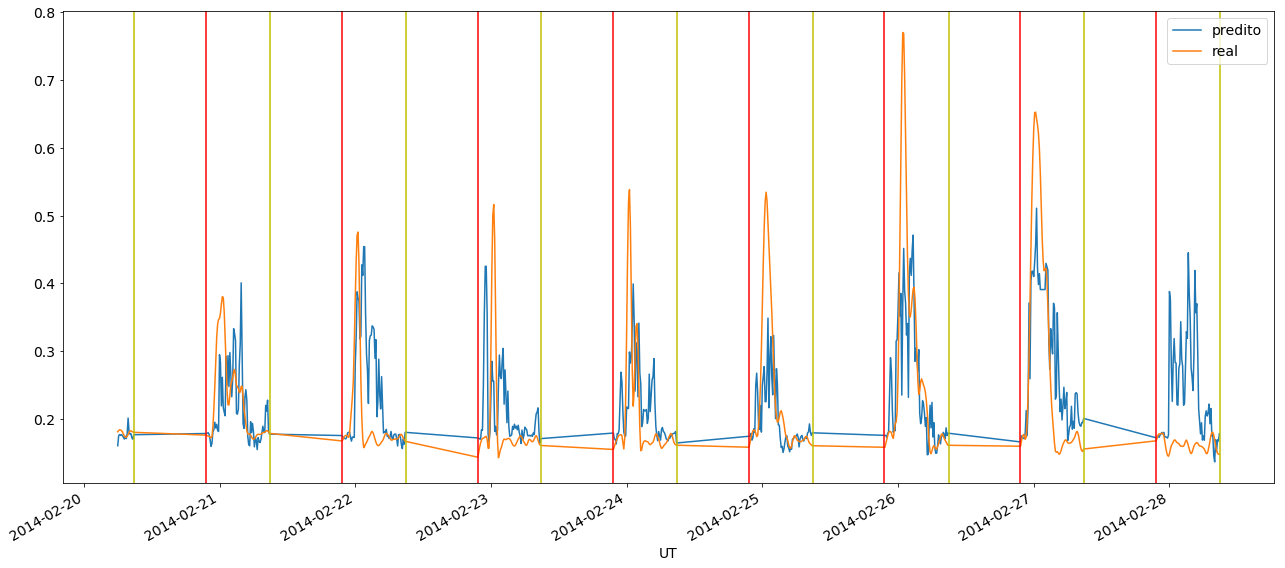


vtec + tempo + lag + mdv1
Error for the time series sample:
O erro quadrático médio foi: 0.012092
O erro quadrático total foi: 2.606893
O maior erro por previsão foi: 0.394132
O erro relativo foi: 31.067248%
O número de verdadeiros negativos foi: 286
O número de verdadeiros positivos foi: 122
O número de falsos negativos foi: 31
O número de falsos positivos foi: 123
O POD foi: 0.797386
O FAR foi: 0.502041
A ACC foi: 0.725979
O kappa foi: 0.075582
precission: 0.497959
recal: 0.797386
f1: 0.613065


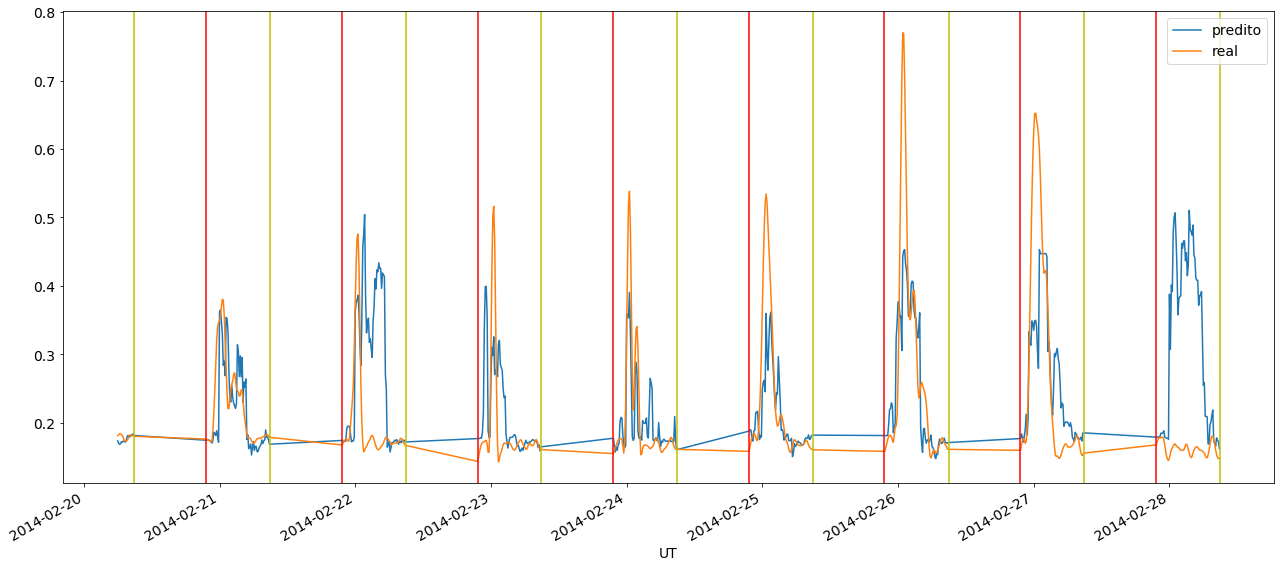


vtec + tempo + lag + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.009620
O erro quadrático total foi: 2.325185
O maior erro por previsão foi: 0.412875
O erro relativo foi: 23.757398%
O número de verdadeiros negativos foi: 290
O número de verdadeiros positivos foi: 112
O número de falsos negativos foi: 41
O número de falsos positivos foi: 119
O POD foi: 0.732026
O FAR foi: 0.515152
A ACC foi: 0.715302
O kappa foi: 0.079843
precission: 0.484848
recal: 0.732026
f1: 0.583333


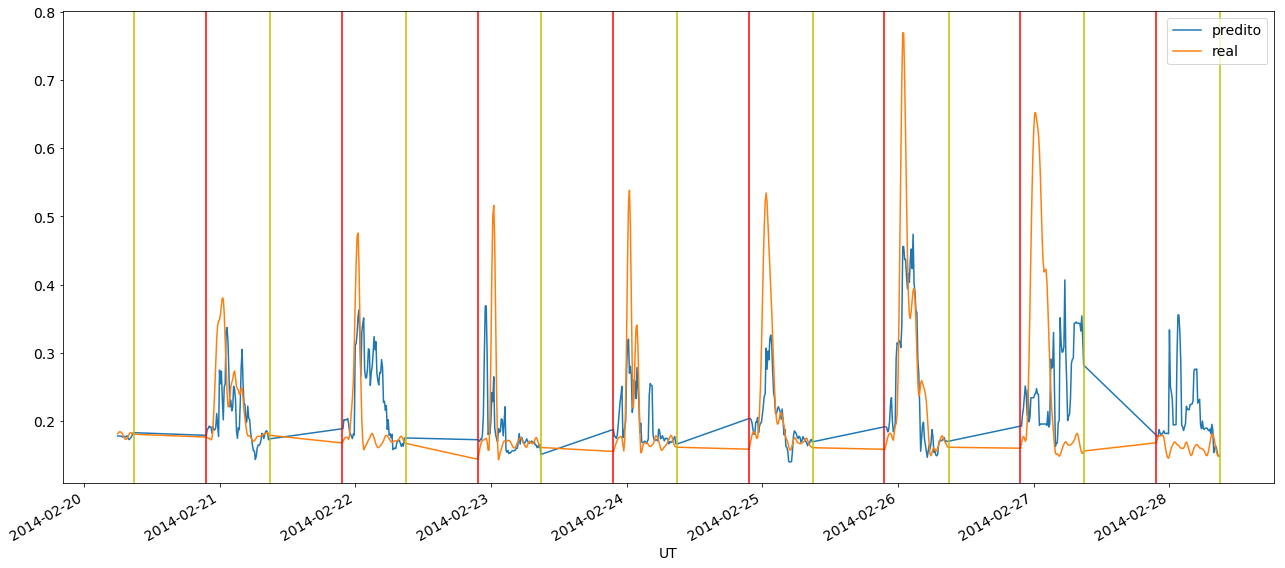


vtec + tempo + lag + mdv1 + mdv2
Error for the time series sample:
O erro quadrático médio foi: 0.010571
O erro quadrático total foi: 2.437418
O maior erro por previsão foi: 0.455135
O erro relativo foi: 29.879304%
O número de verdadeiros negativos foi: 267
O número de verdadeiros positivos foi: 125
O número de falsos negativos foi: 28
O número de falsos positivos foi: 142
O POD foi: 0.816993
O FAR foi: 0.531835
A ACC foi: 0.697509
O kappa foi: 0.079869
precission: 0.468165
recal: 0.816993
f1: 0.595238


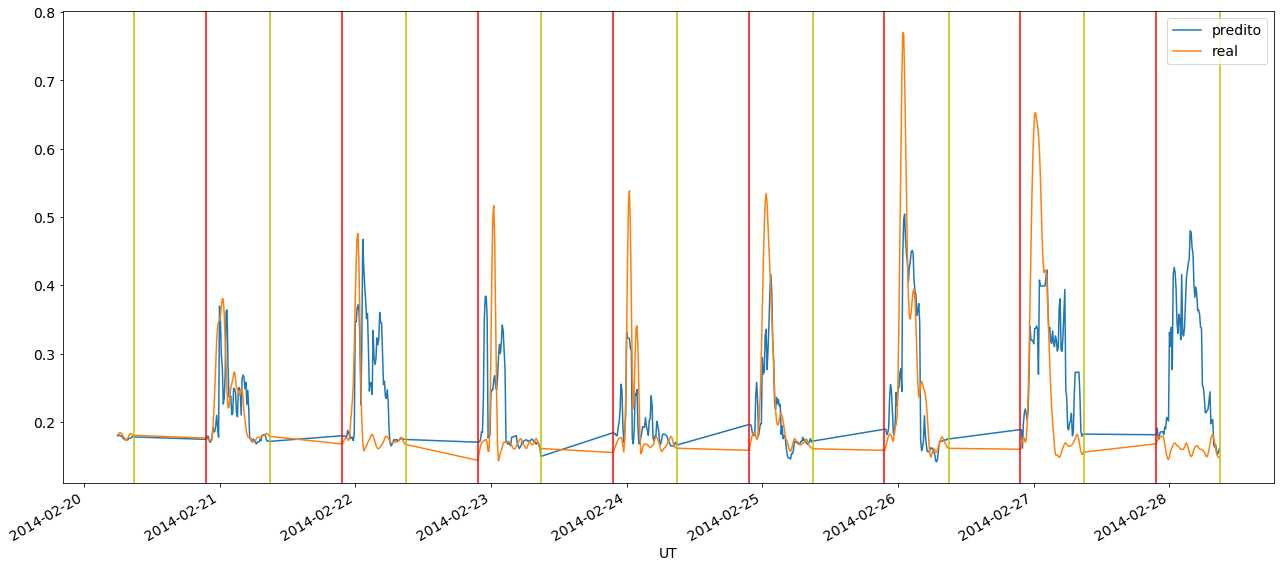

In [6]:
errors = []
for i in set_tests:
    print(i.name)
    dict_error = generate_and_avaliate_model(df=df,
                                            instances_set=list(i.set),
                                            target='s4',
                                            save=True,
                                            file_to_save_model='./images/09_analise_all/' + i.name + '.eps ')
    dict_error['name'] = i.name
    errors.append(dict_error)
    print()

In [7]:
df = pd.DataFrame(errors) 
df.index = df['name']
del df['name']
df = df[['tp', 'tn', 'fp', 'fn', 're', 'pod', 'far', 'acc', 'precission', 'recall', 'f1', 'kappa', 'me', 'tse', 'mse']]
pd.set_option('precision', 4)

In [8]:
df

,tp,tn,fp,fn,re,pod,far,acc,precission,recall,f1,kappa,me,tse,mse
name,,,,,,,,,,,,,,,
original,126,286,123,27,20.0924,0.8235,0.4940,0.7331,0.5060,0.8235,0.6269,0.0735,0.4602,2.1388,0.0081
original - vtec,121,216,193,32,29.1712,0.7908,0.6146,0.5996,0.3854,0.7908,0.5182,0.0958,0.4415,2.2946,0.0094
original - vtec_dt,124,275,134,29,21.6927,0.8105,0.5194,0.7100,0.4806,0.8105,0.6034,0.0779,0.4444,2.1610,0.0083
original - gvtec1,123,286,123,30,20.9786,0.8039,0.5000,0.7278,0.5000,0.8039,0.6165,0.0751,0.4334,2.2219,0.0088
original - gvtec1_dt,118,303,106,35,20.0442,0.7712,0.4732,0.7491,0.5268,0.7712,0.6260,0.0732,0.4916,2.2066,0.0087
original - gvtec2,127,235,174,26,25.8658,0.8301,0.5781,0.6441,0.4219,0.8301,0.5595,0.0893,0.4964,2.2577,0.0091
original - gvtec2_dt,125,289,120,28,23.2365,0.8170,0.4898,0.7367,0.5102,0.8170,0.6281,0.0731,0.4679,2.3258,0.0096
original + tempo,125,255,154,28,23.1878,0.8170,0.5520,0.6762,0.4480,0.8170,0.5787,0.0836,0.4752,2.1680,0.0084
original + gvtec1_dt_lag_9,125,283,126,28,21.7259,0.8170,0.5020,0.7260,0.4980,0.8170,0.6188,0.0750,0.4989,2.0582,0.0075
